# Bias-Variance Trade-off on Linear Regression

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [95]:
def get_w(x, y, polynomial_degree):
    
    x, y = np.array(x), np.array(y)
    phi = np.column_stack([x**i for i in range(0, polynomial_degree + 1)])
    
    phi_dot_phi = np.dot(phi.T, phi)
    phi_dot_y = np.dot(phi.T, y)
    
    w = np.dot(np.linalg.inv(phi_dot_phi), phi_dot_y)
    
    return w


def plot_regression(x, y, w, figsize=(10,3), color=None):
    
    polynomial_degree = len(w) - 1
    plt.figure(figsize=figsize)
    
    plt.ylim(bottom=min(y), top=max(y))
    x_line = np.linspace(min(x), max(x), 10000)
    plt.plot(x_line, [sum(d**i * w[i] for i in range(0, polynomial_degree + 1)) for d in x_line], color='red')
    plt.scatter(x, y, color=color)
    
    plt.show()

    return w

### Random Data

In [7]:
np.random.seed(1245)
random_data = np.random.uniform(0.0, 1.0, size = (20,2))
random_x, random_y = zip(*random_data)

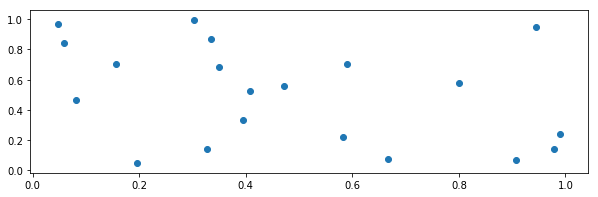

In [57]:
plt.figure(figsize=(10,3))
plt.scatter(random_x, random_y)
plt.show()

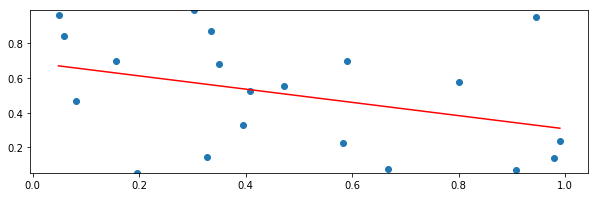

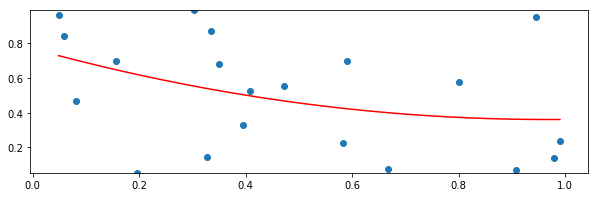

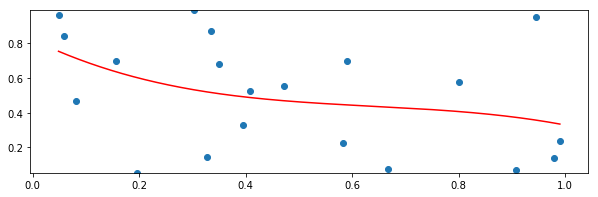

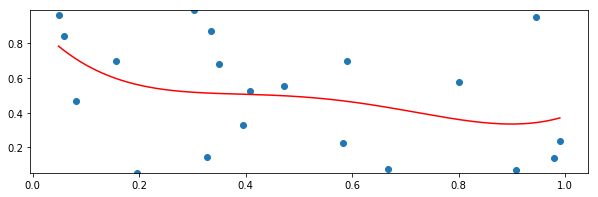

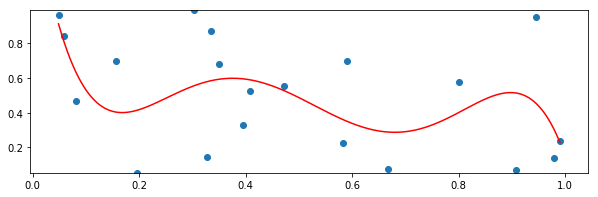

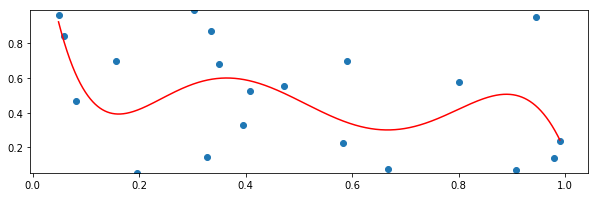

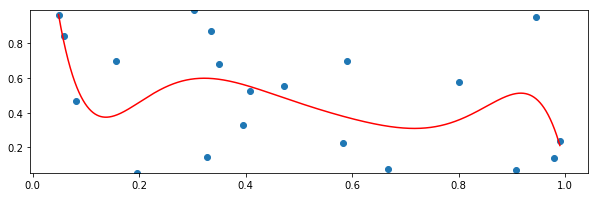

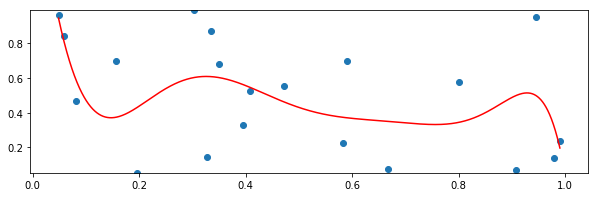

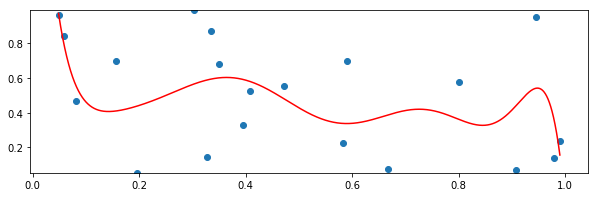

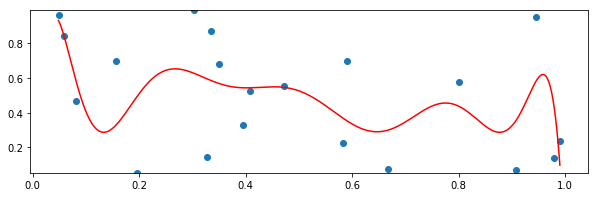

In [98]:
for i in range(1, 11):
    w = get_w(random_x, random_y, i)
    plot_regression(random_x, random_y, w)

# Astronomical Data

In [63]:
train = pd.read_csv('planet_OGLE_Train.dat', sep=",", header=0)
test = pd.read_csv('planet_OGLE_Test.dat', sep=",", header=0)
train.head()

,Days,Mag,error
0,2.452073e+06,15.651,0.008
1,2.452073e+06,15.646,0.008
2,2.452073e+06,15.643,0.008
3,2.452073e+06,15.650,0.008
4,2.452073e+06,15.658,0.008


In [105]:
max(train['Days']), min(test['Days'])

(2452088.6283900002, 2452088.6386699998)

In [102]:
max_x = max(max(train['Days']), max(test['Days']))
min_x = min(min(train['Days']), min(test['Days']))
x_range = max_x - min_x

max_y = max(max(train['Mag']), max(test['Mag']))
min_y = min(min(train['Mag']), min(test['Mag']))
y_range = max_y - min_y
            
x_train_norm = (train['Days'] - min_x) / x_range
y_train_norm = (train['Mag'] - min_y) / y_range

x_test_norm = (test['Days'] - min_x) / x_range          
y_test_norm = (test['Mag'] - min_y) / y_range

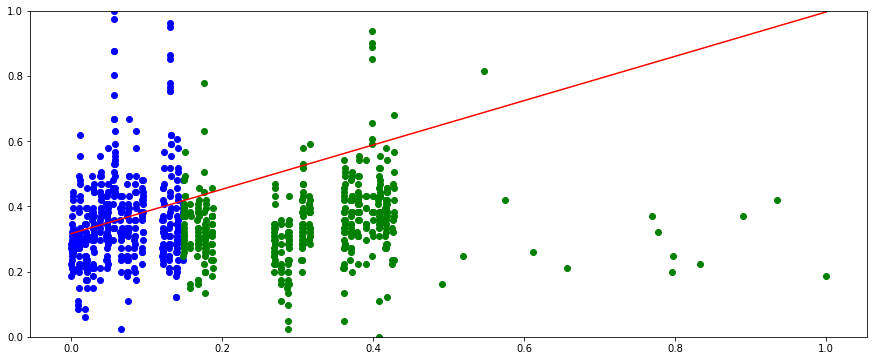

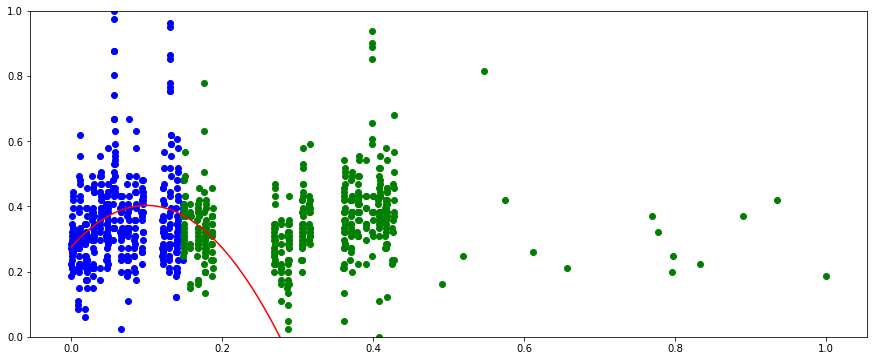

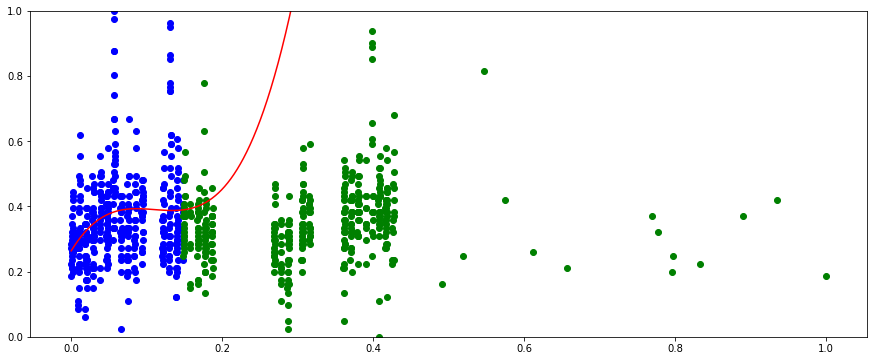

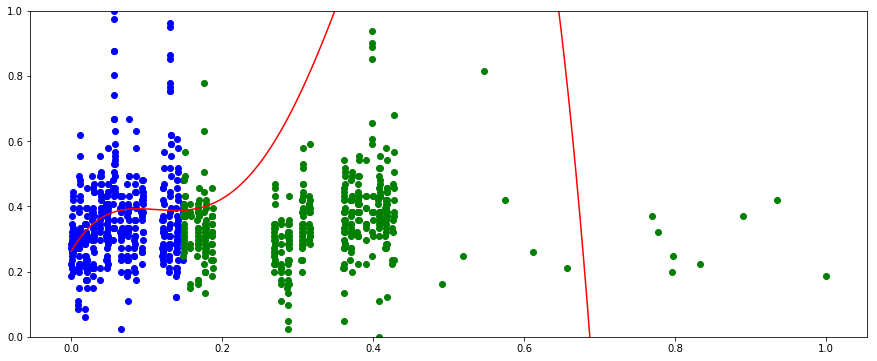

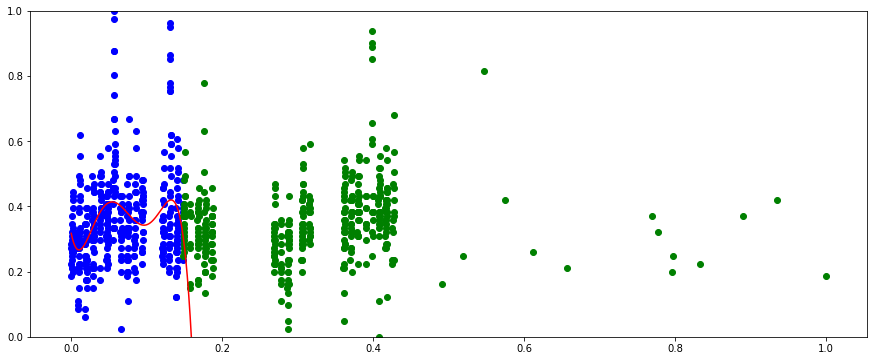

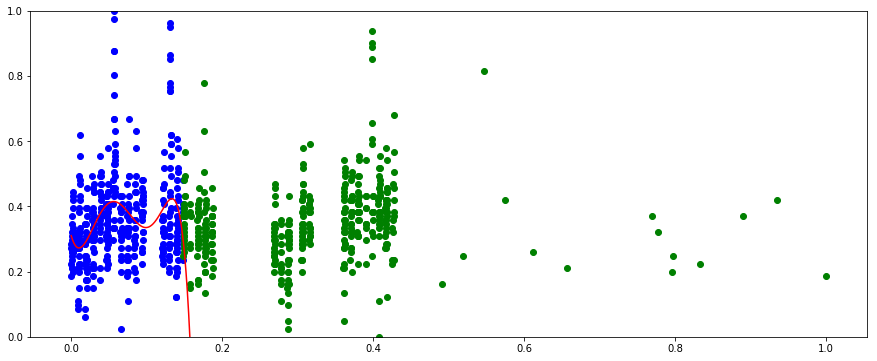

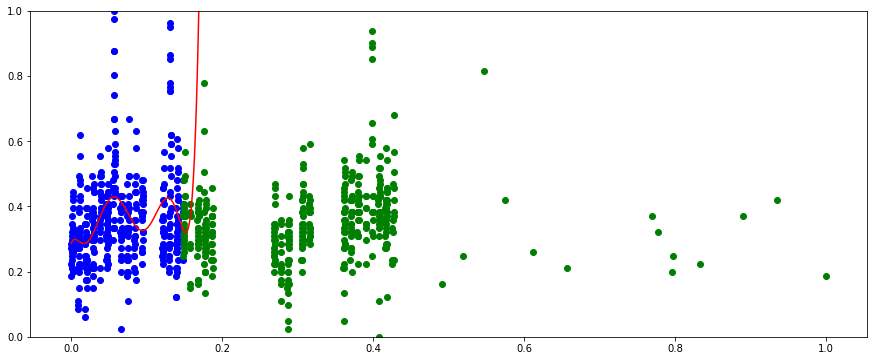

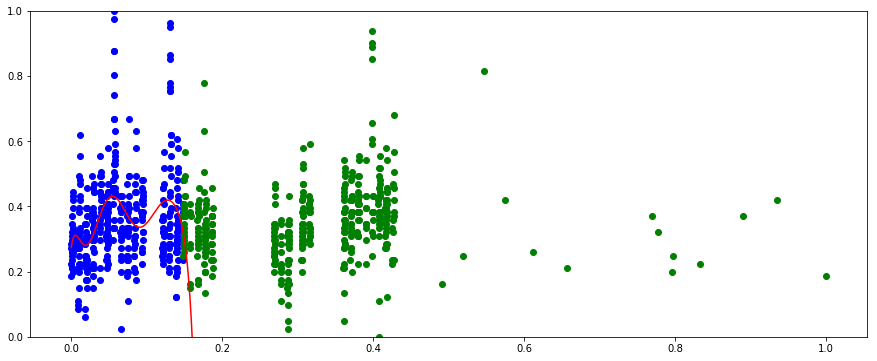

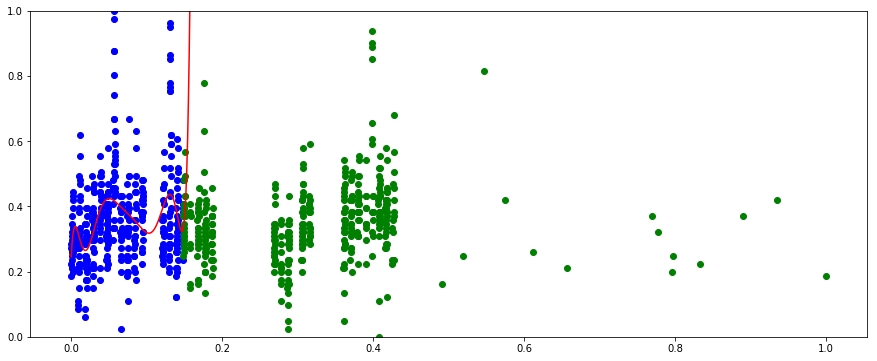

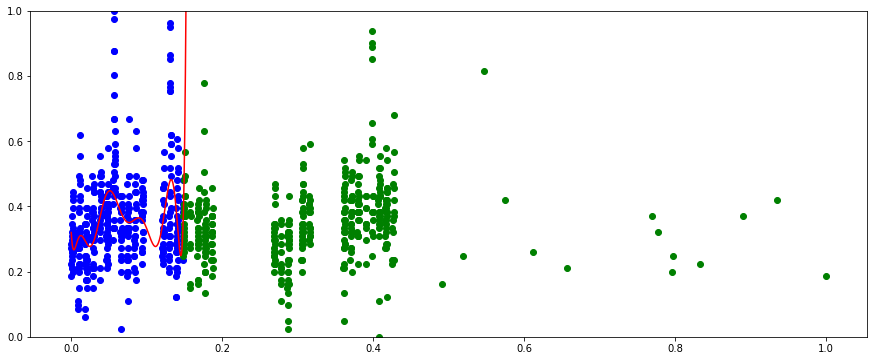

In [107]:
for polynomial_degree in range(1, 11):
    w = get_w(x_train_norm, y_train_norm, polynomial_degree)
    
    plt.figure(figsize=(15,6))
    plt.ylim(bottom=0, top=1)
    
    x_line = np.linspace(0, 1, 10000)
    plt.plot(x_line, [sum(d**i * w[i] for i in range(0, polynomial_degree + 1)) for d in x_line], color='red')
    plt.scatter(x_train_norm, y_train_norm, color='blue')
    plt.scatter(x_test_norm, y_test_norm, color='green')

    plt.show()